# 1. Data Observation

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
path = "E:/Hackathon/CabFarePrediction/"

In [31]:
train = pd.read_csv(path+'TRAIN.CSV')
test = pd.read_csv(path + 'TEST.CSV')

In [32]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [33]:
train.shape, test.shape

((100000, 9), (25000, 8))

In [34]:
test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [35]:
test['cab_type'].value_counts()

UberXL          2180
WAV             2180
UberX           2151
Black           2151
Black SUV       2150
UberPool        2144
Lyft            2059
Lux Black       2021
Shared          2018
Lyft XL         2016
Lux             1975
Lux Black XL    1955
Name: cab_type, dtype: int64

In [36]:
train['cab_type'].value_counts()

Black           8744
Black SUV       8712
UberXL          8676
UberX           8588
WAV             8585
UberPool        8558
Lyft XL         8115
Lux Black XL    8065
Lux             8060
Shared          7998
Lyft            7957
Lux Black       7942
Name: cab_type, dtype: int64

In [37]:
train['cab_provider'].value_counts()

Uber    51863
Lyft    48137
Name: cab_provider, dtype: int64

In [38]:
train['distance'].max(), train['distance'].min()

(7.5, 0.02)

In [39]:
train['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

The private rideshare service says it uses an algorithm based on classic supply and demand: When demand for cars goes up, prices go up to decrease demand and to encourage more drivers to get on the road, increasing supply.

` Price = Normal Price * Surge_multiplier `

# Exploratory Data Analaysis

## Missing values

In [40]:
train.isnull().sum()

index               0
time_stamp          0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
fare                0
dtype: int64

In [41]:
test.isnull().sum()

index               0
time_stamp          0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
dtype: int64

## Univariate Analysis (Target)

In [42]:
train['fare']

0        34.0
1        18.5
2        19.5
3        10.5
4        32.0
         ... 
99995    12.0
99996    26.0
99997    16.0
99998     7.0
99999     7.0
Name: fare, Length: 100000, dtype: float64

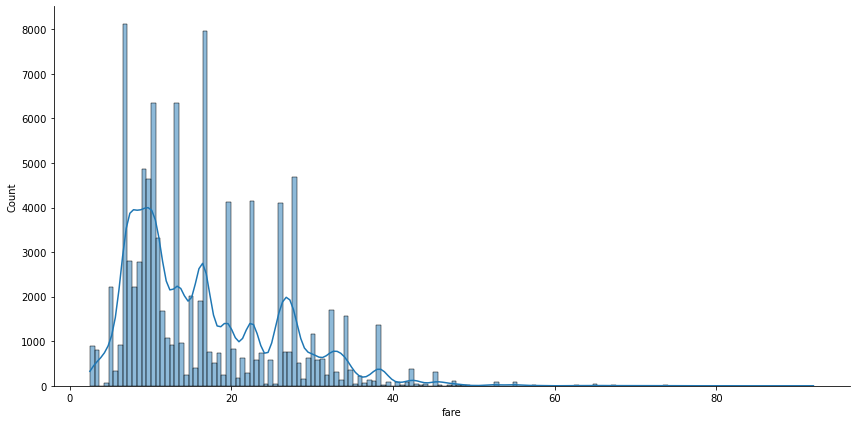

In [43]:
sns.displot(x = 'fare', data = train, aspect = 2, height = 6, kde = True);

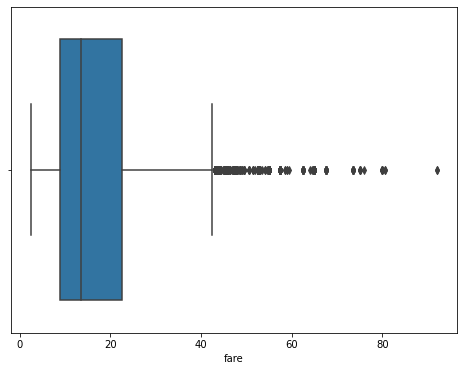

In [44]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'fare', data = train);

In [45]:
# Skew and kurt

print("Skewness: %f" % train['fare'].skew())
print("Kurtosis: %f" % train['fare'].kurt())

Skewness: 1.039652
Kurtosis: 1.149118


In [46]:
xtrain = train.copy()
xtest = test.copy()

In [47]:
# Let's apply Log(1+x) on Fare

xtrain['fare'] = np.log1p(xtrain['fare'])

### Extract Day Date and Time from TimeStamp

In [48]:
xtrain['date_time'] = pd.to_datetime(xtrain['time_stamp'] / 1000, unit = 's')

In [169]:
xtrain['hour'] = xtrain['date_time'].dt.hour
xtrain['']

In [170]:
xtest['date_time'] = pd.to_datetime(xtest['time_stamp'] / 1000, unit = 's')

In [171]:
xtest['hour'] = xtest['date_time'].dt.hour

In [49]:
xtrain

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date_time
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,3.555348,2018-11-26 03:40:46.318000128
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,2.970414,2018-11-26 03:40:46.319000064
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,3.020425,2018-11-26 03:40:46.320000000
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,2.442347,2018-11-26 03:40:46.320000000
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,3.496508,2018-11-26 03:40:46.320000000
...,...,...,...,...,...,...,...,...,...,...
99995,99995,1543364124049,Uber,North End,West End,1.16,1.0,UberXL,2.564949,2018-11-28 00:15:24.048999936
99996,99996,1543364124049,Uber,North End,West End,1.16,1.0,Black SUV,3.295837,2018-11-28 00:15:24.048999936
99997,99997,1543364124049,Uber,North End,West End,1.16,1.0,Black,2.833213,2018-11-28 00:15:24.048999936
99998,99998,1543364124049,Uber,North End,West End,1.16,1.0,UberX,2.079442,2018-11-28 00:15:24.048999936


## Corrleation

Let's encode all the features and check the correlation

In [172]:
labeldf = xtrain.copy()

In [173]:
from sklearn import preprocessing

In [174]:
label_encoder = preprocessing.LabelEncoder()

In [175]:
for i in labeldf:
    if labeldf[i].dtypes == 'object':
        labeldf[i] = label_encoder.fit_transform(labeldf[i])

In [176]:
labeldf.head(4)

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date_time,hour
0,0,1543203646318,0,2,10,3.03,1.0,4,3.555348,2018-11-26 03:40:46.318000128,3
1,1,1543203646319,1,9,10,1.30,1.0,0,2.970414,2018-11-26 03:40:46.319000064,3
2,2,1543203646320,1,10,3,2.71,1.0,9,3.020425,2018-11-26 03:40:46.320000000,3
3,3,1543203646320,0,8,1,2.43,1.0,5,2.442347,2018-11-26 03:40:46.320000000,3


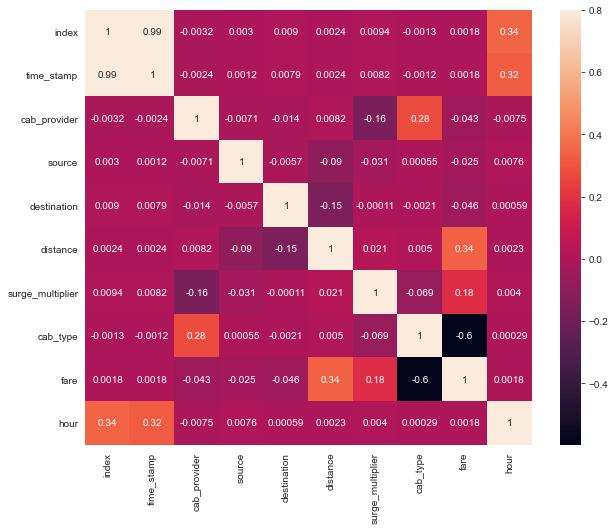

In [177]:
corrmat = labeldf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax = .8, annot = True);

In [178]:
xtrain.drop('index', inplace = True, axis =1)
xtrain.drop('time_stamp', inplace = True, axis = 1)
xtrain.drop('date_time', inplace = True, axis = 1)

In [179]:
xtest.drop('index', inplace = True, axis =1)
xtest.drop('time_stamp', inplace = True, axis = 1)
xtest.drop('date_time', inplace = True, axis = 1)

## Fix skewed Features

In [180]:
# Fetch all numerical features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in xtrain.columns:
    if xtrain[i].dtype in numeric_dtypes:
        numeric.append(i)

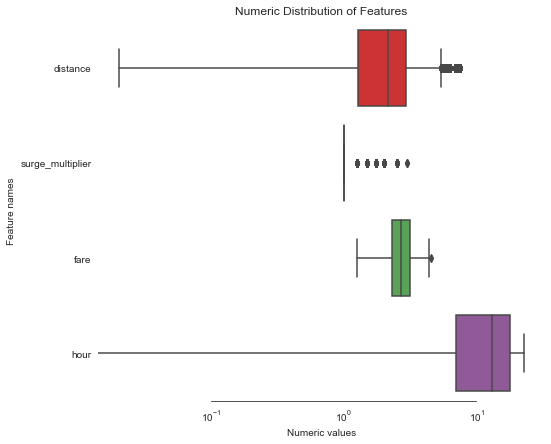

In [181]:
# Create box plots for all numeric features

sns.set_style('white')
f, ax = plt.subplots(figsize = (8,7))
ax.set_xscale('log')
ax = sns.boxplot(data = xtrain[numeric], orient = "h", palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel = "Feature names")
ax.set(xlabel = "Numeric values")
ax.set(title = "Numeric Distribution of Features")
sns.despine(trim = True, left = True)

### Balancing Dataset

In [182]:
# surge_multiplier

xtrain['surge_multiplier'].value_counts()

1.00    96753
1.25     1715
1.50      764
1.75      403
2.00      337
2.50       23
3.00        5
Name: surge_multiplier, dtype: int64

In [183]:
xfilter = xtrain[xtrain['surge_multiplier'] == 1.00][:1800]

In [184]:
xtrain = xtrain[xtrain['surge_multiplier'] != 1.00]

In [185]:
xtrain['surge_multiplier'].value_counts()

1.25    1715
1.50     764
1.75     403
2.00     337
2.50      23
3.00       5
Name: surge_multiplier, dtype: int64

In [186]:
xtrain = pd.concat([xtrain, xfilter])

In [187]:
xtrain['surge_multiplier'].value_counts()

1.00    1800
1.25    1715
1.50     764
1.75     403
2.00     337
2.50      23
3.00       5
Name: surge_multiplier, dtype: int64

In [188]:
#xtrain = xtrain[xtrain['surge_multiplier'] != 3.00]
#xtrain = xtrain[xtrain['surge_multiplier'] != 2.50]


In [189]:
xtrain['surge_multiplier'].value_counts()

1.00    1800
1.25    1715
1.50     764
1.75     403
2.00     337
2.50      23
3.00       5
Name: surge_multiplier, dtype: int64

In [190]:
xtest['surge_multiplier'].value_counts()

1.00    24141
1.25      453
1.50      210
1.75       97
2.00       89
2.50        8
3.00        2
Name: surge_multiplier, dtype: int64

In [191]:
xtrain.shape

(5047, 8)

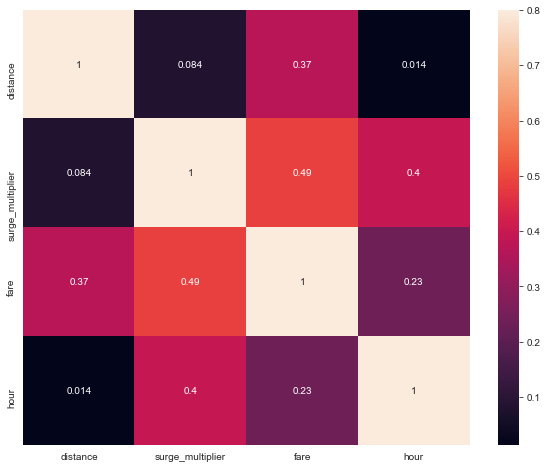

In [192]:
# Correlation


corrmat = xtrain.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, vmax = .8, annot = True);

In [193]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [194]:
# Find skewed numerical features

skew_features = xtrain[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 3 numerical features with Skew > 0.5 :


surge_multiplier    1.172733
hour                0.654340
distance            0.529393
fare               -0.139172
dtype: float64

In [195]:
xxtrain = xtrain.copy()

In [196]:
# Normalize skewed features

xxtrain["distance"] = boxcox1p(xxtrain["distance"], boxcox_normmax(xxtrain["distance"] + 1))
xxtrain["hour"] = boxcox1p(xxtrain["hour"], boxcox_normmax(xxtrain["hour"] + 1))


In [197]:
# Find skewed numerical features (train set)

skew_features = xxtrain[numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 1 numerical features with Skew > 0.5 :


surge_multiplier    1.172733
distance            0.012835
hour               -0.069378
fare               -0.139172
dtype: float64

In [198]:
# Fetch all test numerical features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
test_numeric = []
for i in xtest.columns:
    if xtest[i].dtype in numeric_dtypes:
        test_numeric.append(i)

In [199]:
# Find skewed numerical features (Test Set)

skew_features = xtest[test_numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 2 numerical features with Skew > 0.5 :


surge_multiplier    8.065760
distance            0.780901
hour               -1.848065
dtype: float64

In [200]:
xtest['distance'] = boxcox1p(xtest['distance'], boxcox_normmax(xtest['distance'] + 1))


In [201]:
# After fixing skewness

skew_features = xtest[test_numeric].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})
skew_features.head(10)

There are 1 numerical features with Skew > 0.5 :


surge_multiplier    8.065760
distance            0.016698
hour               -1.848065
dtype: float64

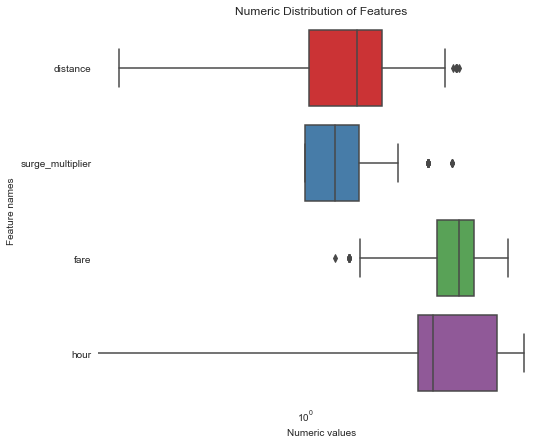

In [202]:
# Create box plots for all numeric features

sns.set_style('white')
f, ax = plt.subplots(figsize = (8,7))
ax.set_xscale('log')
ax = sns.boxplot(data = xxtrain[numeric], orient = "h", palette = 'Set1')
ax.xaxis.grid(False)
ax.set(ylabel = "Feature names")
ax.set(xlabel = "Numeric values")
ax.set(title = "Numeric Distribution of Features")
sns.despine(trim = True, left = True)

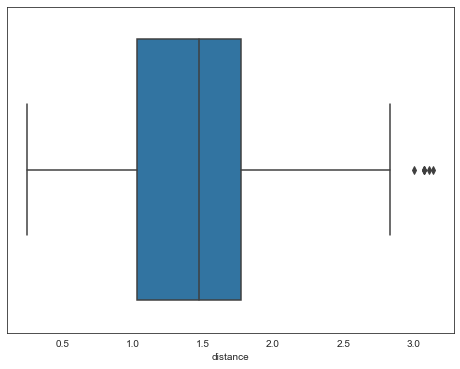

In [203]:
# Distance

plt.figure(figsize = (8,6))
sns.boxplot(x = 'distance', data = xxtrain);

## Outliers

In [204]:
xxtrain.describe()

,distance,surge_multiplier,fare,hour
count,5047.000000,5047.000000,5047.000000,5047.000000
mean,1.394401,1.296117,3.052743,3.115621
std,0.495119,0.311962,0.557868,1.220464
min,0.249024,1.000000,1.252763,0.000000
25%,1.031332,1.000000,2.674149,2.328539
50%,1.468933,1.250000,3.157000,2.589061
75%,1.772177,1.500000,3.511545,4.195903
max,3.141089,3.000000,4.532599,5.131239


In [205]:
xtest.describe()

,distance,surge_multiplier,hour
count,25000.000000,25000.000000,25000.000000
mean,1.210186,1.015840,9.842960
std,0.422695,0.098815,3.663577
min,0.019835,1.000000,0.000000
25%,0.881959,1.000000,9.000000
50%,1.257600,1.000000,11.000000
75%,1.526535,1.000000,12.000000
max,2.579573,3.000000,14.000000


## Encode Categorical Features

In [206]:
xxtrain = pd.get_dummies(xxtrain).reset_index(drop = True)
xtest = pd.get_dummies(xtest).reset_index(drop = True)

In [207]:
xxtrain

,distance,surge_multiplier,fare,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,2.298737,1.75,3.881564,1.694760,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2.298737,1.75,4.151040,1.694760,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1.518567,1.25,3.020425,1.694760,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.161216,1.75,3.295837,1.694760,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.648764,1.25,3.157000,2.034612,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,1.760116,1.00,2.862201,2.589061,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5043,0.427152,1.00,2.079442,2.589061,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5044,1.760116,1.00,3.511545,2.589061,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5045,1.025739,1.00,3.295837,2.589061,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [208]:
xtest

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.481668,1.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.481668,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.444188,1.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.916622,1.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.481668,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.570573,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.570573,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.570573,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.542412,1.0,14,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Models , Evaluation Metrics and Tuning

## Training and test sets

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


extrain = xxtrain.copy()
extrain = extrain.sample(frac = 1)
extrain = extrain.iloc[:10000]

In [210]:
X = xxtrain.drop('fare', axis = 1)
y = xxtrain['fare']

# test data

tX = xtest.copy()

In [211]:
scaler = StandardScaler()

**Scaling Training Data**

In [212]:
X[['distance','hour']] = scaler.fit_transform(X[['distance','hour']])

In [213]:
X

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,1.826681,1.75,-1.164313,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.826681,1.75,-1.164313,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.250805,1.25,-1.164313,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.471013,1.75,-1.164313,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.513792,1.25,-0.885824,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,0.738713,1.00,-0.431485,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5043,-1.953762,1.00,-0.431485,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5044,0.738713,1.00,-0.431485,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5045,-0.744666,1.00,-0.431485,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [214]:
scaler = StandardScaler()

**Scaling Testing Data**

In [215]:
tX

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0.481668,1.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.481668,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.444188,1.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.916622,1.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.481668,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.570573,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,1.570573,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,1.570573,1.0,14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,1.542412,1.0,14,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [216]:
tX[['distance','hour']] = scaler.fit_transform(tX[['distance','hour']])

In [217]:
tX

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,-1.723543,1.0,-2.686761,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-1.723543,1.0,-2.686761,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.919424,1.0,-2.686761,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.694521,1.0,-2.686761,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.723543,1.0,-2.686761,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.852610,1.0,1.134717,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,0.852610,1.0,1.134717,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24997,0.852610,1.0,1.134717,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0.785986,1.0,1.134717,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Multicollinearity

In [218]:
X.corr()

,distance,surge_multiplier,hour,cab_provider_Lyft,cab_provider_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,...,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
distance,1.000000,0.093659,0.016355,0.017866,-0.017866,-0.115663,-0.038819,0.246473,0.180961,0.036242,...,0.011092,0.002186,0.004132,0.009496,0.005237,-0.030438,0.014741,-0.012624,-0.006699,-0.004392
surge_multiplier,0.093659,1.000000,0.350161,0.458307,-0.458307,0.160324,-0.011867,0.063905,0.068723,-0.049841,...,0.104326,0.104672,0.119363,0.110551,0.118770,-0.151282,-0.172322,-0.168413,-0.167848,-0.177236
hour,0.016355,0.350161,1.000000,0.306538,-0.306538,0.072812,0.005322,0.012026,0.017161,0.009212,...,0.075278,0.082775,0.069534,0.071590,0.072736,-0.098731,-0.112286,-0.112413,-0.114936,-0.118129
cab_provider_Lyft,0.017866,0.458307,0.306538,1.000000,-1.000000,0.079438,0.025759,0.042399,0.044047,-0.008225,...,0.212330,0.207352,0.210934,0.208133,0.203904,0.076937,-0.375996,-0.367468,-0.366235,-0.386718
cab_provider_Uber,-0.017866,-0.458307,-0.306538,-1.000000,1.000000,-0.079438,-0.025759,-0.042399,-0.044047,0.008225,...,-0.212330,-0.207352,-0.210934,-0.208133,-0.203904,-0.076937,0.375996,0.367468,0.366235,0.386718
source_Back Bay,-0.115663,0.160324,0.072812,0.079438,-0.079438,1.000000,-0.110480,-0.119312,-0.117047,-0.101870,...,0.005192,0.018402,0.026076,0.022685,0.017488,-0.010074,-0.037558,-0.020703,-0.031556,-0.022294
source_Beacon Hill,-0.038819,-0.011867,0.005322,0.025759,-0.025759,-0.110480,1.000000,-0.109337,-0.107261,-0.093353,...,0.012647,0.012744,0.016119,-0.014565,0.007196,-0.015408,-0.018737,-0.008605,-0.004264,-0.009993
source_Boston University,0.246473,0.063905,0.012026,0.042399,-0.042399,-0.119312,-0.109337,1.000000,-0.115835,-0.100815,...,0.001073,0.014211,0.015049,0.006144,0.011361,-0.004982,0.014664,-0.027226,-0.011874,-0.042714
source_Fenway,0.180961,0.068723,0.017161,0.044047,-0.044047,-0.117047,-0.107261,-0.115835,1.000000,-0.098901,...,0.022257,-0.013005,0.015074,0.034724,-0.007231,-0.011604,-0.020220,-0.025553,-0.013791,-0.015771
source_Financial District,0.036242,-0.049841,0.009212,-0.008225,0.008225,-0.101870,-0.093353,-0.100815,-0.098901,1.000000,...,0.008298,0.005473,-0.000235,-0.007446,-0.011359,-0.008999,0.017697,-0.009404,0.016573,0.022469


In [219]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5))&(i!=j)]
z, len(z)

([], 0)

## Calculating VIF

In [220]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


distance                               1.750652
surge_multiplier                       1.525504
hour                                   1.196547
cab_provider_Lyft                           inf
cab_provider_Uber                           inf
source_Back Bay                             inf
source_Beacon Hill                          inf
source_Boston University                    inf
source_Fenway                               inf
source_Financial District                   inf
source_Haymarket Square                     inf
source_North End                            inf
source_North Station                        inf
source_Northeastern University              inf
source_South Station                        inf
source_Theatre District                     inf
source_West End                             inf
destination_Back Bay                        inf
destination_Beacon Hill                     inf
destination_Boston University               inf
destination_Fenway                      

In [221]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [222]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

cab_provider_Lyft has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


cab_provider_Uber has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


source_Back Bay has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


source_Boston University has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


destination_Back Bay has been removed
cab_type_Lux has been removed
surge_multiplier has been removed


,distance,hour,source_Beacon Hill,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,cab_type_Black SUV,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,1.826681,-1.164313,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.826681,-1.164313,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.250805,-1.164313,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.471013,-1.164313,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.513792,-0.885824,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(distance                               1.737987
 hour                                   1.137940
 source_Beacon Hill                     1.883910
 source_Fenway                          1.582307
 source_Financial District              1.781816
 source_Haymarket Square                1.533048
 source_North End                       1.378187
 source_North Station                   1.487549
 source_Northeastern University         1.679647
 source_South Station                   1.684080
 source_Theatre District                2.052300
 source_West End                        1.717683
 destination_Beacon Hill                1.541353
 destination_Boston University          1.871571
 destination_Fenway                     1.903099
 destination_Financial District         1.633558
 destination_Haymarket Square           2.191543
 destination_North End                  2.193959
 destination_North Station              1.598967
 destination_Northeastern University    1.991749
 destination_South S

In [224]:
X = vif_data[:]

## Multicollinearity Test Data

In [225]:
tX.shape

(25000, 41)

In [226]:
## pair of independent variables with correlation greater than 0.5
k = tX.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([], 0)

In [227]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = tX[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


distance                               1.696355
surge_multiplier                       1.054097
hour                                   1.004884
cab_provider_Lyft                           inf
cab_provider_Uber                           inf
source_Back Bay                             inf
source_Beacon Hill                          inf
source_Boston University                    inf
source_Fenway                               inf
source_Financial District                   inf
source_Haymarket Square                     inf
source_North End                            inf
source_North Station                        inf
source_Northeastern University              inf
source_South Station                        inf
source_Theatre District                     inf
source_West End                             inf
destination_Back Bay                        inf
destination_Beacon Hill                     inf
destination_Boston University               inf
destination_Fenway                      

In [228]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [229]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

cab_provider_Lyft has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


cab_provider_Uber has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


source_Back Bay has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


source_Boston University has been removed


C:\Users\basto\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


destination_Back Bay has been removed
cab_type_Lyft has been removed
surge_multiplier has been removed


,distance,hour,source_Beacon Hill,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,-1.723543,-2.686761,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.723543,-2.686761,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.919424,-2.686761,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.694521,-2.686761,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.723543,-2.686761,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [230]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(distance                               1.651924
 hour                                   1.004463
 source_Beacon Hill                     1.965474
 source_Fenway                          1.666647
 source_Financial District              1.976591
 source_Haymarket Square                2.037783
 source_North End                       1.778740
 source_North Station                   1.940027
 source_Northeastern University         1.703317
 source_South Station                   1.749908
 source_Theatre District                1.951675
 source_West End                        1.901068
 destination_Beacon Hill                1.652397
 destination_Boston University          2.421983
 destination_Fenway                     2.335370
 destination_Financial District         1.688325
 destination_Haymarket Square           2.455064
 destination_North End                  2.510182
 destination_North Station              1.630247
 destination_Northeastern University    2.395512
 destination_South S

In [231]:
tX = vif_data[:]

In [298]:
tX.shape, X.shape

((25000, 34), (5047, 34))

In [233]:
from sklearn.model_selection import KFold, cross_val_score

In [234]:
# Setup cross validation folds

kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [235]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Setup cross validation and define error metrics

In [237]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

### Setup models

In [238]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#### Linear Regression

In [239]:
model = LinearRegression()

In [240]:
model.fit(X_train, y_train)

LinearRegression()

In [241]:
print("Test R^2 Score: {:.5f}".format(model.score(X, y)))

Test R^2 Score: 0.89169


#### Light GBM

In [242]:
# Light Gradient Boosting Regressor

lightgbm = LGBMRegressor()

param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

gbm_grid = GridSearchCV(lightgbm, 
                   param_grid, 
                   cv = 2, 
                   n_jobs = 4,
                   verbose = True)
gbm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2916 candidates, totalling 5832 fits


GridSearchCV(cv=2, estimator=LGBMRegressor(), n_jobs=4,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [400, 700, 1000],
                         'num_leaves': [50, 100, 200],
                         'reg_alpha': [1.1, 1.2, 1.3],
                         'reg_lambda': [1.1, 1.2, 1.3],
                         'subsample': [0.7, 0.8, 0.9], 'subsample_freq': [20]},
             verbose=True)

In [243]:
print(gbm_grid.best_score_)

0.8935636555506918


In [244]:
print(gbm_grid.best_params_)

{'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.9, 'subsample_freq': 20}


In [245]:
gbm_params = {'colsample_bytree': 0.7, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.9, 'subsample_freq': 20}
lightgbm = LGBMRegressor(**gbm_params)

#### XGBoost

In [246]:
#XGBoost Regressor
xgboost = XGBRegressor()

param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgboost, 
                   param_grid, 
                   cv = 2, 
                   n_jobs = 4, 
                   verbose = True)

xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[20:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [247]:
print(xgb_grid.best_score_)

0.9203614524775592


In [248]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [249]:
xgboost_params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
xgboost = XGBRegressor(**xgboost_params)

### Ridge Regressor

In [250]:
#Ridge Regressor
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

ridge_reg = Ridge()

ridge_grid = GridSearchCV(ridge_reg, 
                     param_grid = dict(alpha= alphas), 
                     cv = 2, 
                     n_jobs = 5, 
                     verbose = True)

ridge_grid.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=Ridge(), n_jobs=5,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             verbose=True)

In [251]:
print(ridge_grid.best_score_)

0.8915291337514442


In [252]:
print(ridge_grid.best_params_)

{'alpha': 0.0}


In [253]:
ridge_alphas = 0.0
ridge = RidgeCV(cv=kf)

### Support Vector Regressor

In [254]:
param_grid={
    
        'C': [0.1, 1, 100, 1000],
        
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
        
        'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        
    }
    

svr = SVR(kernel = 'rbf')

svr_grid = GridSearchCV(svr,
                      param_grid,
                      cv = 2, 
                      scoring = 'neg_mean_squared_error',
                      verbose = 0, 
                      n_jobs = 4)

In [255]:
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
             scoring='neg_mean_squared_error')

In [256]:
print(svr_grid.best_score_)

-0.03111719299273668


In [257]:
print(svr_grid.best_params_)

{'C': 1, 'epsilon': 0.1, 'gamma': 0.1}


In [258]:
svr = SVR(C= 1, epsilon= 0.1, gamma=0.1)

### Gradient Boosting Regressor

In [259]:
gbr = GradientBoostingRegressor()

gbr_params = parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }


gbr_grid = GridSearchCV(gbr, gbr_params, 
                        cv =2 , 
                        n_jobs = 4, 
                        verbose = True)

gbr_grid.fit(X_train,y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]},
             verbose=True)

In [260]:
print(gbr_grid.best_score_)

0.91660988679882


In [261]:
print(gbr_grid.best_params_)

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [262]:
gbr_params = {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

In [263]:
gbr = GradientBoostingRegressor(**gbr_params)

**GBR with balanced dataset**

- R2 Score: 0.9704435818146127
- Mean Squarred Error: 0.009362925635660182
- RMSE: 0.09676221181670137
- Mean Absolute Error : 0.06750763991137315

## RandomForest

In [264]:
estimator = RandomForestRegressor()

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

rf_grid = GridSearchCV(estimator, 
                       param_grid, 
                       n_jobs = 4, 
                       cv = 5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [265]:
rf_grid.best_score_

0.9004025085269747

In [266]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [267]:
rf_params = {'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

rf = RandomForestRegressor(**rf_params)

### StackingCVRegressor

In [275]:
# 
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

## Train Models

In [276]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgmb: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgmb: 0.1726 (0.0061)


In [277]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[20:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost cor

In [278]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1706 (0.0060)


In [279]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 0.1846 (0.0055)


In [280]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.1731 (0.0079)


In [281]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.1517 (0.0075)


### Fit the models

In [282]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

stack_gen
[20:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to X

In [283]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

lightgbm


In [284]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

xgboost
[20:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:32:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [285]:
print('Svr')
svr_model_full_data = svr.fit(X, y)

Svr


In [286]:
print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

Ridge


In [287]:
print('RandomForest')
rf_model_full_data = rf.fit(X, y)

RandomForest


In [288]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

GradientBoosting


### Blend models and get Predictions

In [289]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [290]:
# Get final precitions from the blended model
blended_score = rmsle(y, blended_predictions(X))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.12844484986714041


**Blended Predictions:** (Attempt 1) with own parameters

- RMSLE score on train data: 0.08116570706030446

**Blended Predictions:** (Attempt 2) with copied parameters

- RMSLE score on train data: 0.08811897173781841

**Blended Predictions:** (Attempt 3) Attempt 2 idea +  with more dataset 

- RMSLE score on train data: 0.08804230009082731

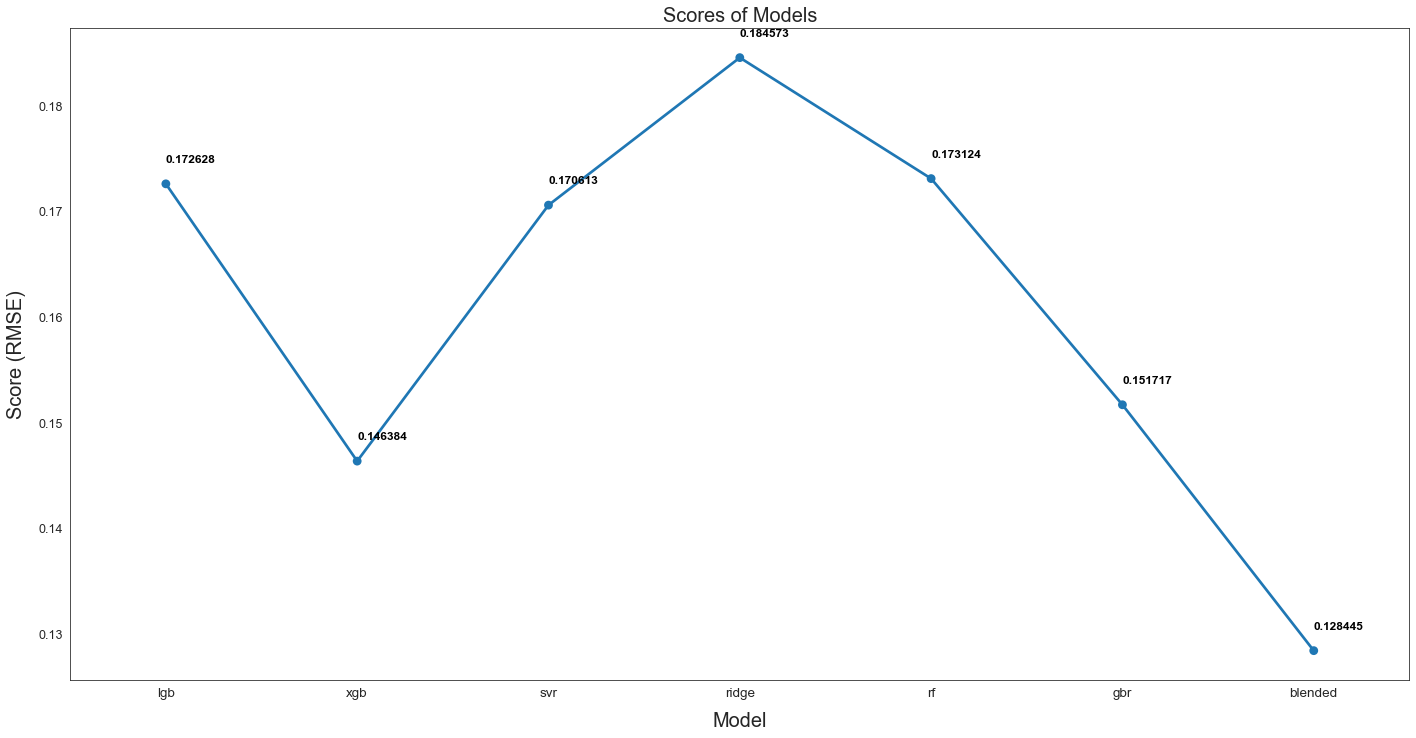

In [291]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [ ]:
## Submit predictions

submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission

In [292]:
output = pd.DataFrame(columns = ['index','fare'])

In [293]:
output['index'] = test.index

In [294]:
output['index'] = output['index'].astype('str')

In [299]:
output['fare'] = np.floor(np.expm1(blended_predictions(tX)))

ValueError: feature_names mismatch: ['distance', 'hour', 'source_Beacon Hill', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End', 'cab_type_Black', 'cab_type_Black SUV', 'cab_type_Lux Black', 'cab_type_Lux Black XL', 'cab_type_Lyft', 'cab_type_Lyft XL', 'cab_type_Shared', 'cab_type_UberPool', 'cab_type_UberX', 'cab_type_UberXL', 'cab_type_WAV'] ['distance', 'hour', 'source_Beacon Hill', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End', 'cab_type_Black', 'cab_type_Black SUV', 'cab_type_Lux', 'cab_type_Lux Black', 'cab_type_Lux Black XL', 'cab_type_Lyft XL', 'cab_type_Shared', 'cab_type_UberPool', 'cab_type_UberX', 'cab_type_UberXL', 'cab_type_WAV']
expected cab_type_Lyft in input data
training data did not have the following fields: cab_type_Lux

In [ ]:
output

In [ ]:
output.to_csv('blended_predictions_output.csv', index = False)

In [ ]:
output['fare'] *= 1.000619

In [ ]:
output

In [ ]:
output.to_csv('blended_predictions_output2.csv', index = False)